<a href="https://colab.research.google.com/github/leoliu-ut/Leo_Production/blob/master/Data_Visualization_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving BusinessAnalyst.csv to BusinessAnalyst.csv


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import io
  
df = pd.read_csv(io.BytesIO(uploaded['BusinessAnalyst.csv'])) 

# **Problem Statement**



> As COVID-19 hits, “tech companies in smaller cities are starting to see an uptick in applications from candidates living in San Francisco and New York -- areas that have long had a grip on tech talent.” [1] Deepinder Singh, founder of a Bloomington, Minn.-based startup, struggles a lot recently as he received too many resumes from talents who used to work for big tech companies from Silicon Valley and New York City. According to him, "I [he] don't even know what kind of salaries they're going to be paid or are thinking of." Similarly, Podium Corp., an 800-person Utah startup, has been considered more than 600 Bay Area applicants recently which is two to three times the volume of typical years.


> Inspired by this story, I’d like to gain some insight into Business Analysts talents and ideally give these entrepreneurs some references about this problem.


# **Dataset Description**

  

> This dataset is created by picklesueat [2] and contains a 4092 job listing for business analyst positions, with features such as Salary Estimate, Location, Company Size, Company Type, Company Rating, Industry, Revenue, and more.



> Below is a screenshot of the dataset. 


In [66]:
df.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True


In [67]:
df.count()

Unnamed: 0           4092
index                4092
Job Title            4092
Salary Estimate      4092
Job Description      4092
Rating               4092
Company Name         4092
Location             4092
Headquarters         4092
Size                 4092
Founded              4092
Type of ownership    4092
Industry             4092
Sector               4092
Revenue              4092
Competitors          3692
Easy Apply           3692
dtype: int64

> Through analyzing this dataset, I’m trying to figure out some distributions among salary, revenue, industry, location, and more. With these insights, I hope to give entrepreneurs like Deepinder Singh some references when it comes to recruiting these talents from big companies. Also, this is also a great opportunity for me to have a glimpse of the status quo of job hunting for a position like Business Analyst.

# **Data Cleaning**

**Delete enetries with missing values**

In [68]:
data=df.dropna()

In [69]:
data.count()

Unnamed: 0           3692
index                3692
Job Title            3692
Salary Estimate      3692
Job Description      3692
Rating               3692
Company Name         3692
Location             3692
Headquarters         3692
Size                 3692
Founded              3692
Type of ownership    3692
Industry             3692
Sector               3692
Revenue              3692
Competitors          3692
Easy Apply           3692
dtype: int64

**Check values of each column**

In [70]:
data['index'].value_counts()

137     1
3168    1
3194    1
2572    1
3986    1
       ..
3667    1
600     1
440     1
4387    1
1422    1
Name: index, Length: 3692, dtype: int64

In [71]:
data['Job Title'].value_counts()

Business Analyst                       502
Data Analyst                           145
Business Systems Analyst               118
Senior Business Analyst                 68
Business Intelligence Analyst           50
                                      ... 
Business Systems Analyst Sr. / Lead      1
HR Business Analyst Senior               1
Management Consultant                    1
Business Systems Analyst - Senior        1
Lead Business Intelligence Analyst       1
Name: Job Title, Length: 1865, dtype: int64

In [72]:
data['Salary Estimate'].value_counts()

$41K-$79K (Glassdoor est.)     60
$43K-$78K (Glassdoor est.)     60
$48K-$87K (Glassdoor est.)     60
$41K-$80K (Glassdoor est.)     59
$43K-$84K (Glassdoor est.)     53
                               ..
$58K-$68K (Glassdoor est.)     13
$69K-$138K (Glassdoor est.)    12
$51K-$95K (Glassdoor est.)     10
$66K-$124K (Glassdoor est.)     3
$59K-$98K (Glassdoor est.)      1
Name: Salary Estimate, Length: 138, dtype: int64

In [73]:
data['Rating'].value_counts()

-1.0    318
3.7     264
3.6     248
5.0     245
3.5     243
3.9     230
3.8     218
4.0     201
3.4     192
3.3     161
4.1     157
3.1     131
3.2     129
4.2     119
3.0      92
4.4      91
4.5      84
4.3      83
4.6      69
2.9      53
4.7      51
2.5      49
2.8      47
2.6      44
4.8      42
4.9      36
2.7      30
2.0      17
1.0      14
2.2      10
2.4      10
2.3       7
2.1       5
1.7       1
1.9       1
Name: Rating, dtype: int64

In [74]:
data['Rating'] = data['Rating'].replace('-1.0',np.nan)
data['Rating'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3.7    264
3.6    248
5.0    245
3.5    243
3.9    230
3.8    218
4.0    201
3.4    192
3.3    161
4.1    157
3.1    131
3.2    129
4.2    119
3.0     92
4.4     91
4.5     84
4.3     83
4.6     69
2.9     53
4.7     51
2.5     49
2.8     47
2.6     44
4.8     42
4.9     36
2.7     30
2.0     17
1.0     14
2.2     10
2.4     10
2.3      7
2.1      5
1.7      1
1.9      1
Name: Rating, dtype: int64

In [75]:
data['Location'].value_counts()

San Diego, CA          348
Houston, TX            340
Austin, TX             331
San Antonio, TX        325
Chicago, IL            268
                      ... 
Blue Bell, PA            1
Rego Park, NY            1
Scotts Valley, CA        1
Manhattan Beach, CA      1
Whittier, CA             1
Name: Location, Length: 209, dtype: int64

In [76]:
data['Size'].value_counts()

10000+ employees           717
51 to 200 employees        709
1001 to 5000 employees     650
1 to 50 employees          474
201 to 500 employees       375
501 to 1000 employees      288
5001 to 10000 employees    206
-1                         187
Unknown                     86
Name: Size, dtype: int64

In [77]:
data['Size']=data['Size'].replace('-1',np.nan)
data['Size'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10000+ employees           717
51 to 200 employees        709
1001 to 5000 employees     650
1 to 50 employees          474
201 to 500 employees       375
501 to 1000 employees      288
5001 to 10000 employees    206
Unknown                     86
Name: Size, dtype: int64

In [78]:
data['Founded'].value_counts()

-1      947
2008    193
2002    105
1999    105
1998     99
       ... 
1870      1
1963      1
1896      1
1718      1
1876      1
Name: Founded, Length: 176, dtype: int64

In [79]:
data['Founded']=data['Founded'].replace('-1',np.nan)
data['Founded'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2008    193
1999    105
2002    105
1998     99
2000     96
       ... 
1876      1
1718      1
1850      1
1818      1
1832      1
Name: Founded, Length: 175, dtype: int64

In [80]:
data['Type of ownership'].value_counts()

Company - Private                 2081
Company - Public                   922
-1                                 187
Subsidiary or Business Segment     167
Nonprofit Organization              88
Government                          84
Unknown                             43
College / University                41
Contract                            26
Hospital                            15
Other Organization                  13
Private Practice / Firm             11
School / School District             9
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [81]:
data['Type of ownership']=data['Type of ownership'].replace('-1',np.nan)
data['Type of ownership'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Company - Private                 2081
Company - Public                   922
Subsidiary or Business Segment     167
Nonprofit Organization              88
Government                          84
Unknown                             43
College / University                41
Contract                            26
Hospital                            15
Other Organization                  13
Private Practice / Firm             11
School / School District             9
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [82]:
data['Industry'].value_counts()

IT Services                           620
-1                                    465
Staffing & Outsourcing                440
Computer Hardware & Software          236
Consulting                            223
                                     ... 
Hotels, Motels, & Resorts               1
Consumer Product Rental                 1
Mining                                  1
Funeral Services                        1
Home Furniture & Housewares Stores      1
Name: Industry, Length: 97, dtype: int64

In [83]:
data['Industry']=data['Industry'].replace('-1',np.nan)
data['Industry'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IT Services                         620
Staffing & Outsourcing              440
Computer Hardware & Software        236
Consulting                          223
Health Care Services & Hospitals    136
                                   ... 
Consumer Product Rental               1
Hotels, Motels, & Resorts             1
News Outlet                           1
Express Delivery Services             1
Travel Agencies                       1
Name: Industry, Length: 96, dtype: int64

In [84]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            864
$10+ billion (USD)                  410
$100 to $500 million (USD)          381
$50 to $100 million (USD)           354
$2 to $5 billion (USD)              236
$10 to $25 million (USD)            235
$25 to $50 million (USD)            190
-1                                  187
$1 to $5 million (USD)              170
$1 to $2 billion (USD)              169
$500 million to $1 billion (USD)    131
$5 to $10 billion (USD)             129
$5 to $10 million (USD)             124
Less than $1 million (USD)          112
Name: Revenue, dtype: int64

In [85]:
data['Revenue']=data['Revenue'].replace('-1',np.nan)
data['Revenue'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unknown / Non-Applicable            864
$10+ billion (USD)                  410
$100 to $500 million (USD)          381
$50 to $100 million (USD)           354
$2 to $5 billion (USD)              236
$10 to $25 million (USD)            235
$25 to $50 million (USD)            190
$1 to $5 million (USD)              170
$1 to $2 billion (USD)              169
$500 million to $1 billion (USD)    131
$5 to $10 billion (USD)             129
$5 to $10 million (USD)             124
Less than $1 million (USD)          112
Name: Revenue, dtype: int64

In [86]:
data['Easy Apply'].value_counts()

-1      3559
True     133
Name: Easy Apply, dtype: int64

In [87]:
data['Easy Apply']=data['Easy Apply'].replace('-1','False')
data['Easy Apply'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False    3559
True      133
Name: Easy Apply, dtype: int64

**Clean all NaN to get a cleaner dataset**

In [88]:
dataclean=data.dropna()

In [89]:
dataclean.count()

Unnamed: 0           2711
index                2711
Job Title            2711
Salary Estimate      2711
Job Description      2711
Rating               2711
Company Name         2711
Location             2711
Headquarters         2711
Size                 2711
Founded              2711
Type of ownership    2711
Industry             2711
Sector               2711
Revenue              2711
Competitors          2711
Easy Apply           2711
dtype: int64

# **Feature Engineer**

*1. Split salary to minSalary and maxSalary*

In [90]:
dataclean['usefulSalary'],dataclean['trash']=dataclean['Salary Estimate'].str.split('(').str
dataclean['minSalary'],dataclean['maxSalary']=dataclean['usefulSalary'].str.split('-').str
dataclean['minSalary']=dataclean['minSalary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
dataclean['maxSalary']=dataclean['maxSalary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [91]:
dataclean.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,usefulSalary,trash,minSalary,maxSalary
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",False,$56K-$102K,Glassdoor est.),56,102
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,False,$56K-$102K,Glassdoor est.),56,102


*2. Split Location*

In [92]:
dataclean['Location'] = dataclean['Location'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
dataclean['City'] = dataclean['Location'].apply(lambda x:x.split(',')[0])
dataclean['State'] = dataclean['Location'].apply(lambda x: x.split(' ')[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
dataclean.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,usefulSalary,trash,minSalary,maxSalary,City,State
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",False,$56K-$102K,Glassdoor est.),56,102,New York,NY
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,False,$56K-$102K,Glassdoor est.),56,102,Florham Park,NJ


# ***Data visualization***

***1. Some distributions***

*Salary distribution*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



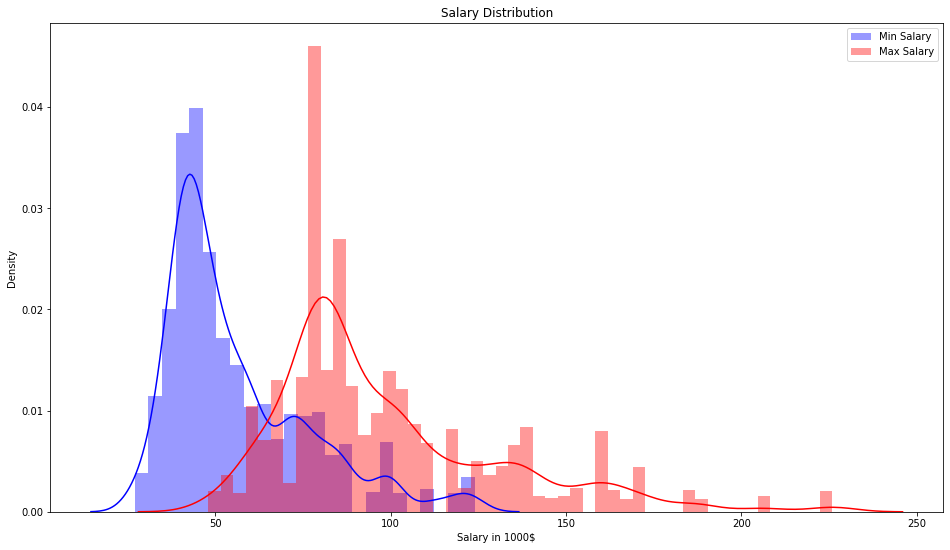

In [95]:
plt.figure(figsize=(16,9))
sns.distplot(a=dataclean['minSalary'], label='Min Salary', color='blue')
sns.distplot(a=dataclean['maxSalary'], bins=50, axlabel='Salary in 1000$', label='Max Salary', color='red').set_title('Salary Distribution')
plt.legend()
plt.show()

>As we can see from the distribution plot above, both minimum and maximum salary follow a normal distribution roughly and skew to the right. The majority of business analysts earn a minimum salary of \$40,000 and a maximum salary of $80,000.

*Rating Distribution*

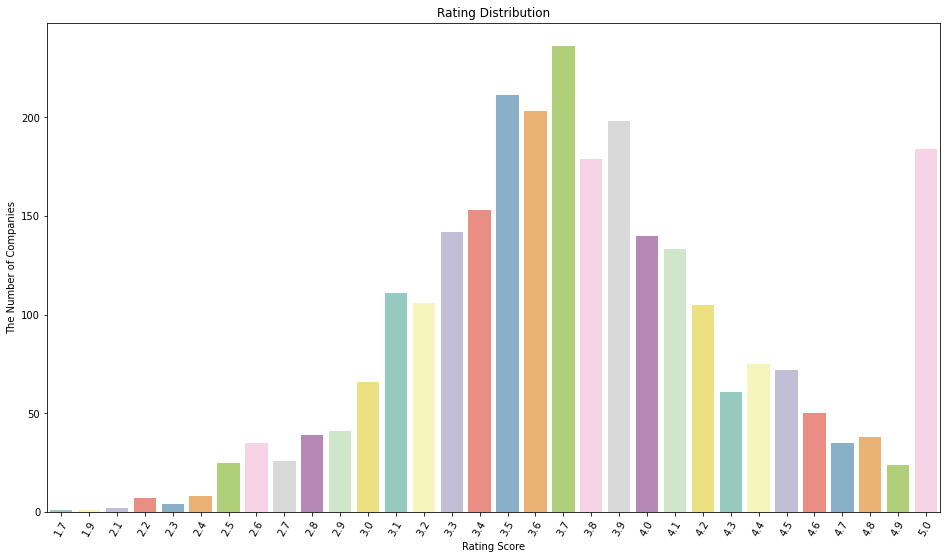

In [96]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x="Rating", data=dataclean.sort_values('Rating'), palette='Set3')
ax.set(title='Rating Distribution', ylabel='The Number of Companies', xlabel='Rating Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='center', fontweight='light')
plt.show()

> As we can see from the count plot above, ratings of these companies follow a normal distribution. The majority of companies rated around 3.6 out of 5. This shows that most companies with business analysts positions have a relatively good reputation. 
 
> Another interesting thing is that there are a significant amount of companies rated 5.0 out of 5.0. This indicates that startups who are trying to compete with big tech companies need to work on their reputation really hard to attract more talents. 

*Company distribution in states*

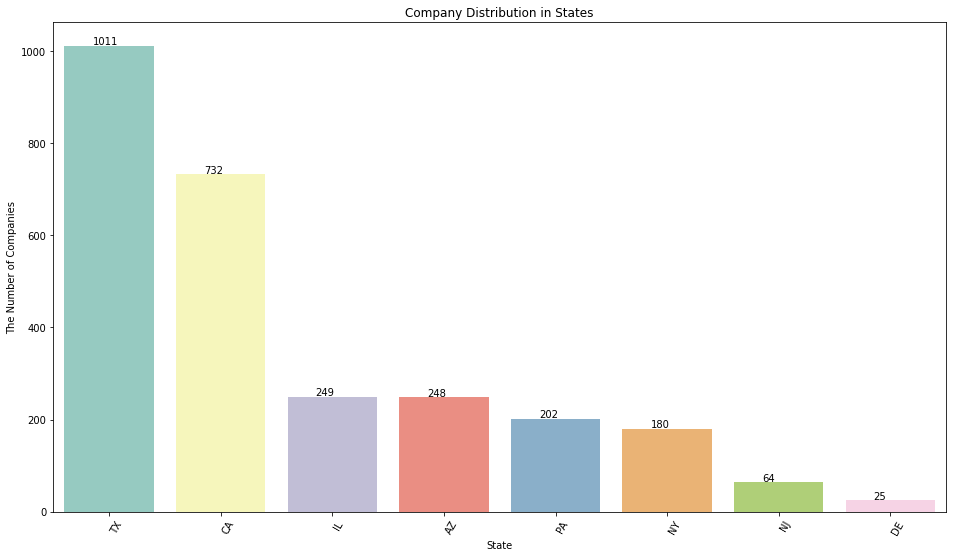

In [97]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='State', data=dataclean, palette='Set3', order=dataclean['State'].value_counts().index)
ax.set(title='Company Distribution in States', ylabel='The Number of Companies', xlabel='State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='left', fontweight='light')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, '%.0f'%(height))
plt.show()

> I'm glad to see Texas wins. In this count plot, over 1000 companies recruiting business analysts are in Texas followed by CA, IL, AZ, and etc.
 
>This chart shows that indeed the majority of companies locates in the states who have a strong technology and economic foundations. Entrepreneurs can choose states such as NJ, DE (both close to NY), or AZ (close to CA) to start their business and attract new talents. Of course, other considerations such as tax regulations, industry laws need to be taken into accounts.

*Company distribution in cities*

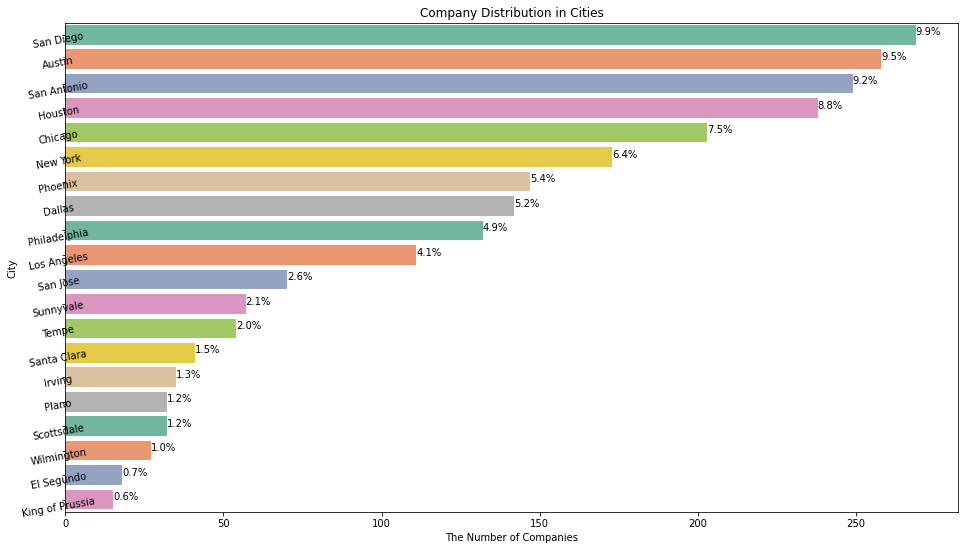

In [98]:
plt.figure(figsize=(16,9))
ax = sns.countplot(y='City', data=dataclean, palette='Set2', order=dataclean['City'].value_counts().iloc[:20].index)

total = len(dataclean['City'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
ax.set(title='Company Distribution in Cities', xlabel='The Number of Companies', ylabel='City')
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
plt.show()

> In this chart, I extract the top 20 cities with business analyst positions. We can notice that San Diego has the most companies for business analyst positions roughly accounting for 10% among the rest, followed by Austin (9.5%), San Antonio (9.2%), and Houston (8.8%). 
 
> From my own perspective, I’d love to stay in TX as business analysts are in high demand, even if in small cities such as Temple, Plano. Also, in the top 10 cities, TX alone takes 5 seats even if both TX and CA have 6 cities listed in the top 20.
 
> I’m a little bit surprised about the fact that San Antonio has more demand compared to other big cities such as Austin, Houston, and Dallas.


*Employee size distribution*

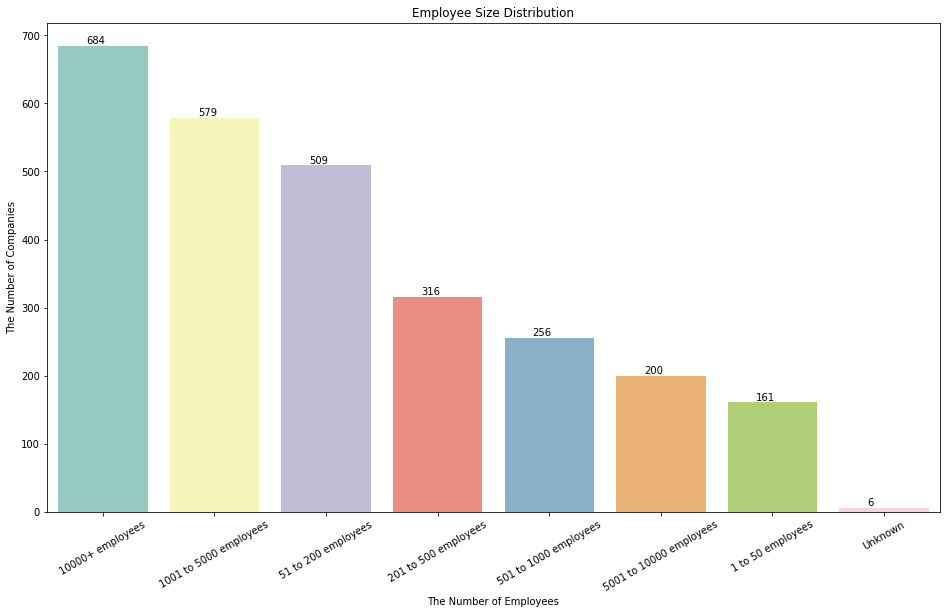

In [99]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=dataclean,x='Size',palette='Set3',order=dataclean['Size'].value_counts().index)
ax.set(title='Employee Size Distribution', xlabel='The Number of Employees', ylabel='The Number of Companies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center', fontweight='light')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, '%.0f'%(height))
plt.show()

> This chart shows that the majority of the companies have over 10,000 employees. However, smaller companies also have demands in recruiting for business analysts. This is definitely good news for job hunters. They have the chance to find a position no matter they are trying to work in a big company or a small one.

*Industry distribution*

In [100]:
labels = dataclean['Industry'].value_counts().index
values = dataclean['Industry'].value_counts().values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

> This pie chart is trying to get the distribution of business analysts by industry. However, there are too many industries listed in the dataset which makes it really hard to read the chart. So, I decided to create a new pie chart only listing industries with at least 50 companies, and others will be shown as “All the rest”.  

*Industry distribution - a better version*

In [101]:
#A revised version

import itertools
dic = {}
for Label, Value in zip(labels, values):
    dic[Label] = Value

In [102]:
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<60) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
values = newdic.values()

<Figure size 1152x1152 with 0 Axes>

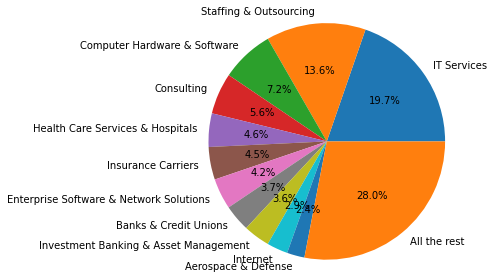

In [103]:
plt.figure(figsize=(16,16))
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

> The new pie chart is clearer than the first one. IT Services are in the greatest need of business analyst, which makes sense to me. Staffing & outsourcing is the next. The only industry to my surprise is the “Aerospace & Defence” industry which accounts for 2.4% of all business analyst positions in the dataset.
 
> Business analyst positions require not only business sense but also knowledge related to the industry. Applicants may use this chart as a reference to learn more about the industry listed in this pie chart. In this way, they could find more opportunities.


*Type of ownership distribution*

In [104]:
labels_owner = dataclean['Type of ownership'].value_counts()[:10].index
values_owner = dataclean['Type of ownership'].value_counts()[:10].values


plt.figure(figsize=(6,6))
layout = go.Layout(
   {
      "title":"Type of Ownership",
   }
)
#fig = go.Figure(data=[go.Pie(labels=labels_owner, values=values_owner)], layout=layout)

data2 = {
   "values": values_owner,
   "labels": labels_owner,
   "hoverinfo":"label+percent+name",
   "hole": .6,
   "type": "pie"
}
import plotly.graph_objs as go
fig = go.Figure(data = data2, layout = layout)

fig.show()

<Figure size 432x432 with 0 Axes>

> In this donut chart, 56.7% of companies are privately held, followed by 36.7% of public ones. Public companies, schools including colleges and universities, and non-profit organizations are also a good choice for business analysts if they are not interested in working for the stock market behind private companies. 

*Founded year distribution*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



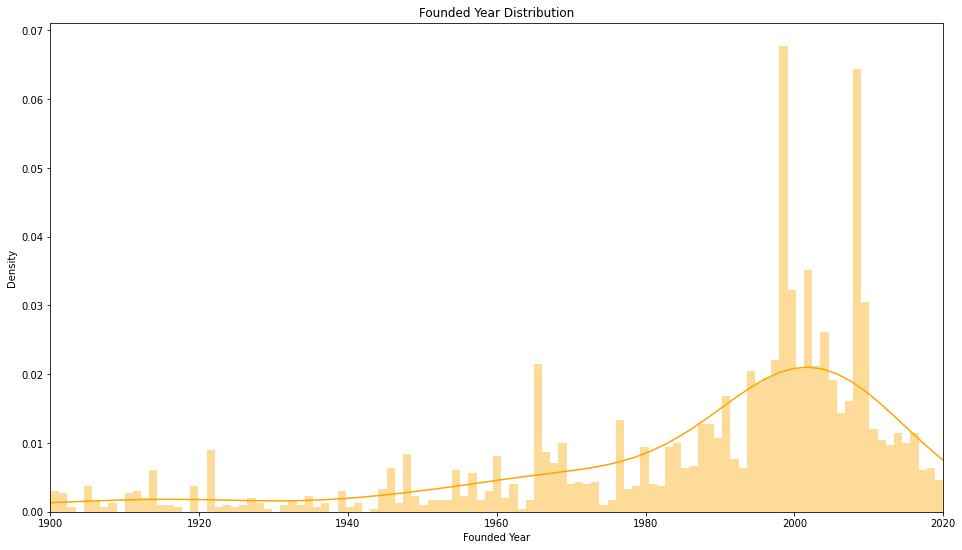

In [105]:
plt.figure(figsize=(16,9))
sns.distplot(a=dataclean['Founded'], bins=300, axlabel='Founded Year',color='orange').set_title('Founded Year Distribution')   
plt.xlim(1900,2020)

plt.show()

> This distribution chart checks the distribution of founded years among these companies with business analyst positions. It makes sense to me as in the year of 2000, internet companies boomed. For these survived from the internet bubble are still trying to expand their market so they need to hire more business analysts to know their customers better. 

**2. Other findings**

*Average minimum and maximum salaries in different industries*

In [106]:
data3=dataclean.groupby('Industry')[['minSalary','maxSalary']].mean().rename(columns={'avgMinSalary':'Avg_min_salary','avgMinSalary':'Avg_max_salary'})
data3=data3.reset_index()
data3.head(2)


,Industry,minSalary,maxSalary
0,Accounting,50.956522,88.608696
1,Advertising & Marketing,55.409091,100.477273


In [107]:
fig = go.Figure()
#fig.add_trace(go.Bar(x=data3.Industry,y=data3['minSalary'],name='Average Minimum salary', base=-data3['minSalary'], marker_color='orange'))
fig.add_trace(go.Bar(x=data3.Industry,y=2*data3['minSalary'],name='Average Minimum salary', base=-data3['minSalary'], marker_color='orange'))
fig.add_trace(go.Bar(x=data3.Industry,y=data3['maxSalary'],name='Average Maximum Salary', marker_color='blue'))

fig.update_layout(title='Average minimum and maximum salary in different industries',barmode='overlay',
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.25 # gap between bars of the same location coordinate.
)

fig.show()

> Commercial Equipment and Repair Industry has the most maximum salary on average ($160k), followed by News Outlet (\$159k). Surprisingly, Commercial Equipment and Repair Industry has the most minimum salary on average (\$102k) as well. This shows that Commercial Equipment and Repair Industry is definitely a good one to work in with great payment. 
 
> This bar chart is also interactive as some industries are not shown on the x-axis due to space limitations. In the ipnyb file, if the mouse hovers on the bar, it will pop up a detailed industry name and the corresponding max/min salary on average. 

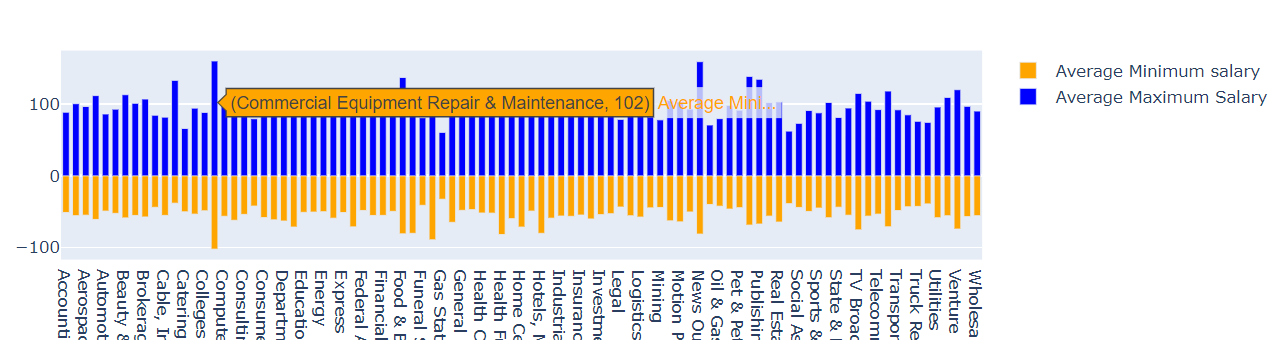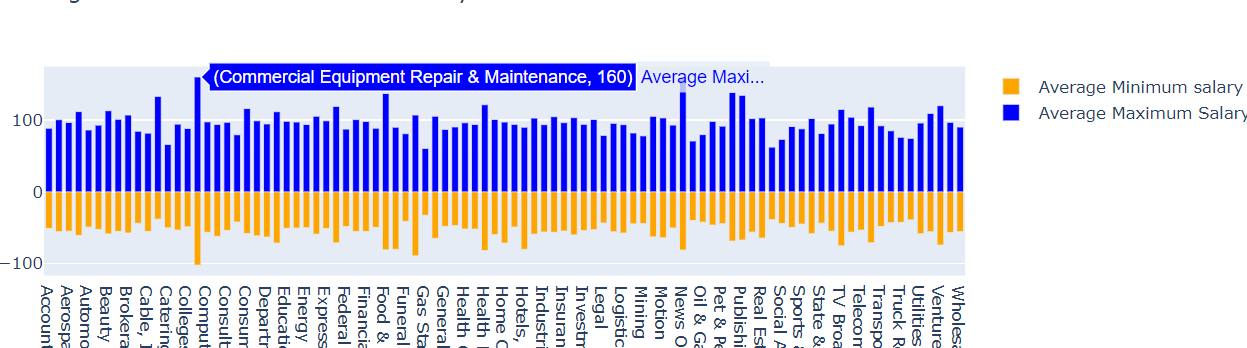

*East to apply by industry*

In [108]:
dataclean['Easy Apply']=='True'

0       False
2       False
3       False
4        True
5       False
        ...  
3685    False
3686    False
3687    False
3688    False
3690    False
Name: Easy Apply, Length: 2711, dtype: bool

In [109]:
data_easy_apply=dataclean[dataclean['Easy Apply']=='True']
data5=data_easy_apply.groupby('Industry')['Easy Apply'].count().reset_index()
industry_dataclean=data5.sort_values('Easy Apply',ascending=False).head(10)
industry_dataclean

,Industry,Easy Apply
25,Staffing & Outsourcing,31
14,IT Services,17
3,Computer Hardware & Software,11
18,Internet,9
4,Consulting,8
9,Federal Agencies,4
21,Logistics & Supply Chain,4
13,Health Care Services & Hospitals,4
0,Advertising & Marketing,3
8,Enterprise Software & Network Solutions,3


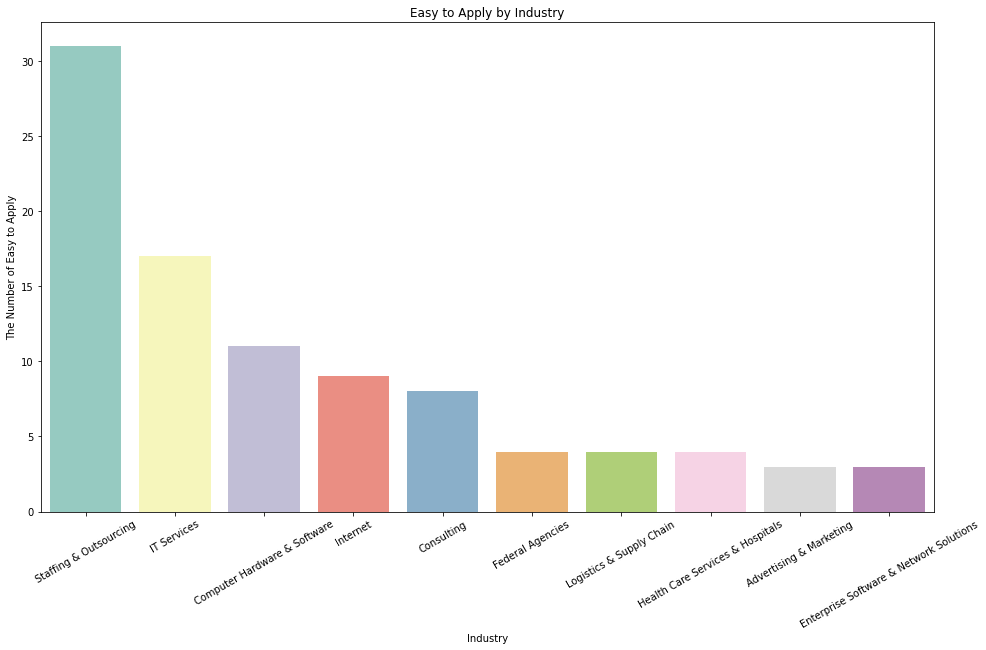

In [110]:
plt.figure(figsize=(16,9))
ax=sns.barplot(data=industry_dataclean,x='Industry', y='Easy Apply', palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center', fontweight='light')
ax.set(title='Easy to Apply by Industry', xlabel='Industry', ylabel='The Number of Easy to Apply')
plt.show()

> This bar plot shows that Staffing & outsourcing industry has the most easy-to-apply business analyst positions, followed by IT Service. 
 
>One special note here for the Internet industry - although the Internet industry only accounts for 2.9% among all the positions (listed as No.19), its recruitment is relatively easy.


*Easy to apply by job title*

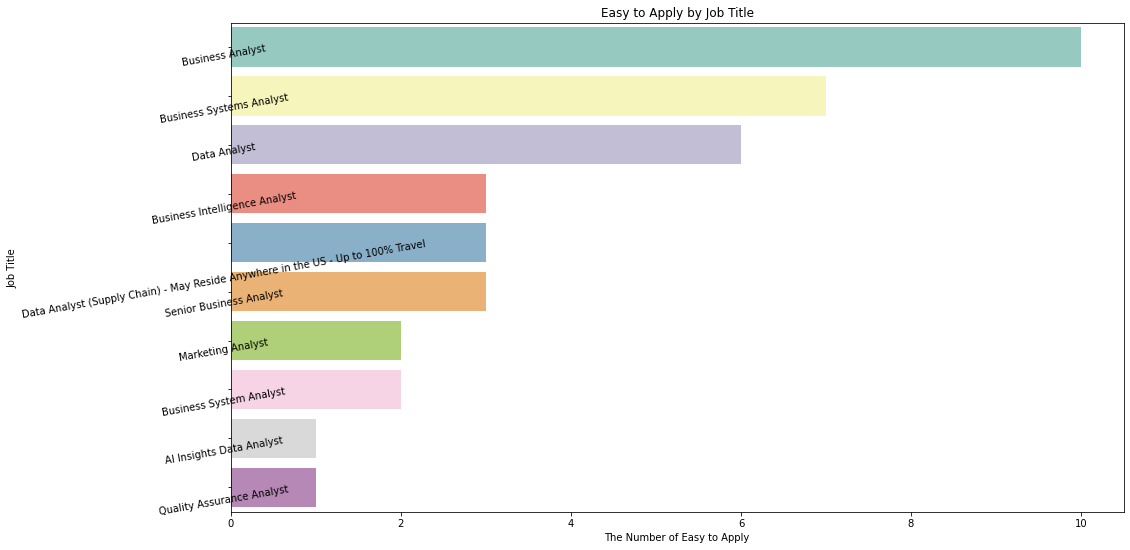

In [111]:
data_easy_apply=dataclean[dataclean['Easy Apply']=='True']
data6=data_easy_apply.groupby('Job Title')['Easy Apply'].count().reset_index()
job_dataclean=data6.sort_values('Easy Apply',ascending=False).head(10)

plt.figure(figsize=(16,9))
ax=sns.barplot(data=job_dataclean, y='Job Title', x='Easy Apply', palette='Set3')
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
ax.set(title='Easy to Apply by Job Title', ylabel='Job Title', xlabel='The Number of Easy to Apply')
plt.show()

> This bar plot shows that Business Analyst is the most easy-to-apply position among all other business analyst related professionals, followed by Business Systems Analyst, and Data Analyst. Watch out for these positions, job hunters! 
 
> It’s funny to see that different companies recruit business analysts with different titles, such as “Business Systems Analyst” and “Business System Analyst”.


*Revenue by industry*

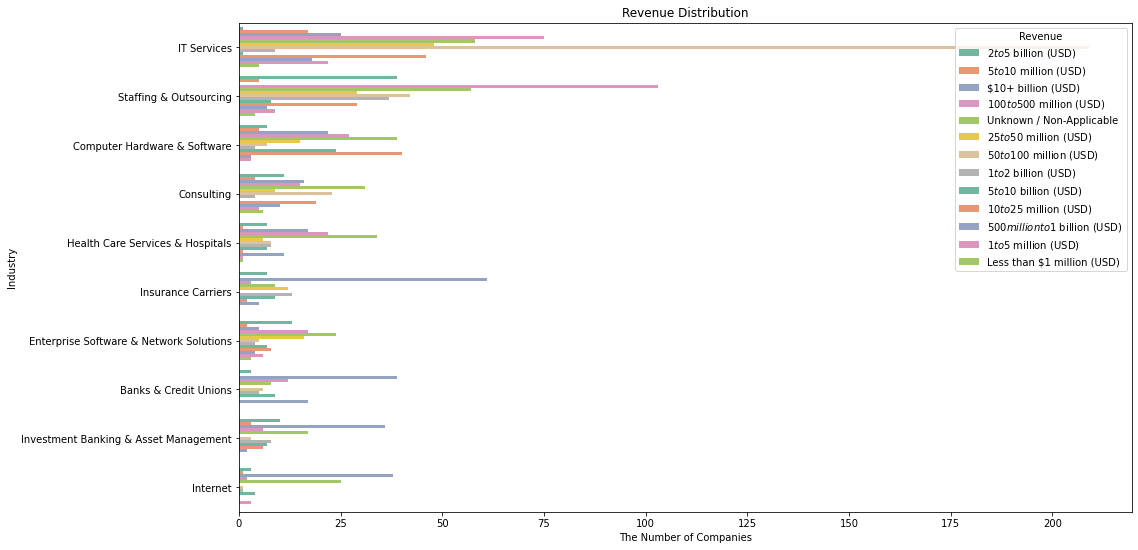

In [112]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=dataclean,y='Industry',palette='Set2', hue='Revenue',order=dataclean['Industry'].value_counts().iloc[:10].index)
ax.set(title='Revenue Distribution', ylabel='Industry', xlabel='The Number of Companies')
#ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
plt.show()

> From this chart, it’s safe to say that Staffing & outsourcing and IT services are the most profitable industries. However, their average salaries are not the highest among all industries. So be careful, job hunters! 
 
> Originally, I planned to calculate the average revenue of each industry then compare them. However, the revenue column of the dataset is listed as in range and as sring.


# **Conclusion**

> In a brief summary. In this project, I gathered the data and cleaned it to make it ready for the feature engineer. After feature engineering, I plotted distributions of salary, rating, state, city, industry, and more. I gave a short description after each plot for either job hunters and entrepreneurs such as Deepinder Singh. On top of distributions, I also graphed the average minimum and maximum salary of each industry. In this way, both applications and entrepreneurs are able to see what’s the average of the corresponding industry before applying and recruiting respectively. Last but least, job hunters like me would love to know whether the position is easy to apply or not. I hope the graphs about easy-to-apply by industry and by positions can shed some light on the level of difficulty and ease their worrisome when it comes to applying for the position. 

> Going back to the problem statement, I tried to answer Deepinder Singh’s question about salary. Singh’s company is a Minnesota-based IT services company. Given my analysis of this dataset, Singh should set a salary with a minimum of \$60k, as this is the minimum salary on average in the IT industry. Also, if when other factors, such as experience, taken into consideration, a more experienced analyst should be paid more than \$102k. The reason why salary should be paid higher than average is that Minnesota has relatively fewer companies/positions in need of business analysts. If the salary is lower than average, it’d be hard to attract applicants.

# **Opportunities**

> On the GitHub data source page, there’s actually a way to scraper more up-to-date data. If I have more time, I’d love to explore more on this and give a more detailed analysis of this position. 

> As for the feature engineer phase, I notice that in the employee size section, the dataset is missing employee size from 51-200. It’d be better if I can figure out the reason whether they are cleaned by “dropna” or some errors happened when graphing. Also, the revenue section is slightly messy as some revenue ranges are overlap with each other. It’d be better if I feature engineer them into a neat mutually exclusive range.

> The business analyst position is unlike positions such as data engineer and data analyst. Business analysts has many different/similar names and sometimes it even overlaps with data engineer/analyst ones. It’d be better if I can figure out a way to target more specifically on this type of position. 
